# Intelligente systemer: Prinsipalkomponentanalyse

Welcome to this notebook which is part of Kristiania University College's course «Utvikling og anvendelse av intelligente systemer», module 4, «Ikke-veiledet læring».

## How to use this notebook
This is a Jupyter notebook with text and Python code that you run by pressing shift-enter. The purpose is to become familiar with relevant concepts in practice, not necessarily to understand all the details of the code. Take the time to read the text, review the code, run the code cells (make sure they are in the correct order), study the results, and think about what we do, why and how.

In this notebook, you will find self-test questions in _italics_. Go to Canvas and answer the questions there before continuing with the notebook.

## The problem: Grouping aircrafts of similar type

Our task is to group aircrafts into similar aircraft types. We have a dataset that includes many features describing a relatively small number of aircraft types. It is however challenging to deal with large number of features. Thus, we would like to reduce the number of features, using principal component analysis. Subsequently, we will cluster the aircrafts using K-means.

## Dataset information

We will use aircraft fact sheets from Delta.com. There are 33 variables describing 44 types of aircrafts, including both quantitative measures on attributes like cruising speed, accommodation and range in miles, as well as categorical data on, say, whether a particular aircraft has Wi-Fi or video.

The data and example have been taken from https://github.com/mylesmharrison/delta_PCA_kmeans with the analysis described here: https://www.r-bloggers.com/2014/06/pca-and-k-means-clustering-of-delta-aircraft. They have been converted to Python using the following very illustrative example: https://365datascience.com/tutorials/python-tutorials/pca-k-means/

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Import data and pre-process

In [2]:
data = pd.read_csv('data/delta.csv')
data

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.00,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.00,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.00,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.00,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.00,32,...,1,1,0,1,0,0,0,1,1,1
5,Airbus A330-200 (3L2),0.0,0,0,0.0,0.0,0,21.0,80.00,34,...,1,1,0,0,1,0,0,1,1,1
6,Airbus A330-200 (3L3),0.0,0,0,0.0,0.0,0,21.0,80.00,34,...,1,1,0,1,0,0,0,1,1,1
7,Airbus A330-300,0.0,0,0,0.0,0.0,0,20.0,60.00,34,...,1,1,0,0,1,0,0,1,1,1
8,Boeing 717,0.0,0,0,19.6,37.0,12,0.0,0.00,0,...,0,1,0,0,0,0,1,0,1,1
9,Boeing 737-700 (73W),0.0,0,0,21.0,37.0,12,0.0,0.00,0,...,1,1,1,0,0,0,1,0,1,1


The available information is:

- Aircraft: Serial number
- Seat Width (class): Size of seats where class is one of Club/First Class/Business/Eco Comfort/Economy classes
- Seat Pitch (class): Distance between seats where class is one of Club/First Class/Business/Eco Comfort/Economy classes
- Seat (class): Number of seats in class where class is one of Club/First Class/Business/Eco Comfort/Economy classes
- Accommodation: Total number of seats
- Cruising Speed (mph)
- Range (miles)
- Engines: Number of engines
- Wingspan (ft)
- Tail Height (ft)
- Length (ft)
- Wifi: Binary variable whether there is wifi accessible
- Video: Binary variable whether there is video accessible
- Power: Binary variable whether there is power accessible
- Satellite: Binary variable whether there is satellite phone accessible
- Flat-bed: Binary variable whether there are flat beds accessible
- Sleeper: Binary variable whether sleepers are available
- Club/First Class/Business/Eco Comfort/Economy: Binary variables whether class is available

Firstly, the number of seats in a given class and whether the class is available contains very similar information. We drop the binary variables on this. We also assume that seat sizes are somewhat standardized for a given class, so we can drop those. Very few of the models have sleepers or flat-beds, so we can also remove those.


In [8]:
categorical_variables = [variable for variable in data.columns[1:] if data[variable].max()==1]
continous_variables = [variable for variable in data.columns[1:] if data[variable].max()>1]

In [9]:
categorical_variables

['Wifi',
 'Video',
 'Power',
 'Satellite',
 'Flat-bed',
 'Sleeper',
 'Club',
 'First Class',
 'Business',
 'Eco Comfort',
 'Economy']

In [10]:
continous_variables

['Seat Width (Club)',
 'Seat Pitch (Club)',
 'Seat (Club)',
 'Seat Width (First Class)',
 'Seat Pitch (First Class)',
 'Seats (First Class)',
 'Seat Width (Business)',
 'Seat Pitch (Business)',
 'Seats (Business)',
 'Seat Width (Eco Comfort)',
 'Seat Pitch (Eco Comfort)',
 'Seats (Eco Comfort)',
 'Seat Width (Economy)',
 'Seat Pitch (Economy)',
 'Seats (Economy)',
 'Accommodation',
 'Cruising Speed (mph)',
 'Range (miles)',
 'Engines',
 'Wingspan (ft)',
 'Tail Height (ft)',
 'Length (ft)']

In [11]:
# Dropping seat sizes
plot_variables = ['Seat (Club)', 'Seats (First Class)', 'Seats (Business)', 
                  'Seats (Eco Comfort)', 'Seats (Economy)', 'Accommodation',
                  'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)',
                  'Tail Height (ft)', 'Length (ft)', 'Wifi', 'Video', 'Power']
print(len(plot_variables))

15


Let us print some basic statistics on the variables.

In [12]:
data[plot_variables].describe()

,Seat (Club),Seats (First Class),Seats (Business),Seats (Eco Comfort),Seats (Economy),Accommodation,Cruising Speed (mph),Range (miles),Engines,Wingspan (ft),Tail Height (ft),Length (ft),Wifi,Video,Power
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.272727,10.545455,11.863636,20.909091,129.659091,172.500000,515.772727,3868.840909,2.045455,132.104795,42.574059,149.942568,0.568182,0.613636,0.568182
std,1.809068,10.801495,16.861392,11.009126,59.686368,79.498281,27.632020,2283.167740,0.301511,42.266210,12.278349,40.294568,0.501056,0.492545,0.501056
min,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,364.000000,731.000000,2.000000,64.916000,20.416000,65.583000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,15.000000,93.000000,123.000000,517.000000,1944.000000,2.000000,107.830000,32.226500,116.937000,0.000000,0.000000,0.000000
50%,0.000000,12.000000,0.000000,19.500000,132.000000,177.500000,517.000000,3173.500000,2.000000,129.790000,44.500000,155.250000,1.000000,1.000000,1.000000
75%,0.000000,17.000000,27.000000,29.250000,171.000000,226.000000,517.000000,6221.000000,2.000000,156.083000,52.000000,180.250000,1.000000,1.000000,1.000000
max,12.000000,36.000000,48.000000,42.000000,286.000000,376.000000,564.000000,10375.000000,4.000000,213.000000,62.541600,231.830000,1.000000,1.000000,1.000000


### Looking for relationsships

First, we standardize all non-categorical variables (so that all variables have values centered on zero and with standard deviation of 1). 

In [13]:
scaler = MinMaxScaler() #another option is StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[plot_variables]), columns=plot_variables)

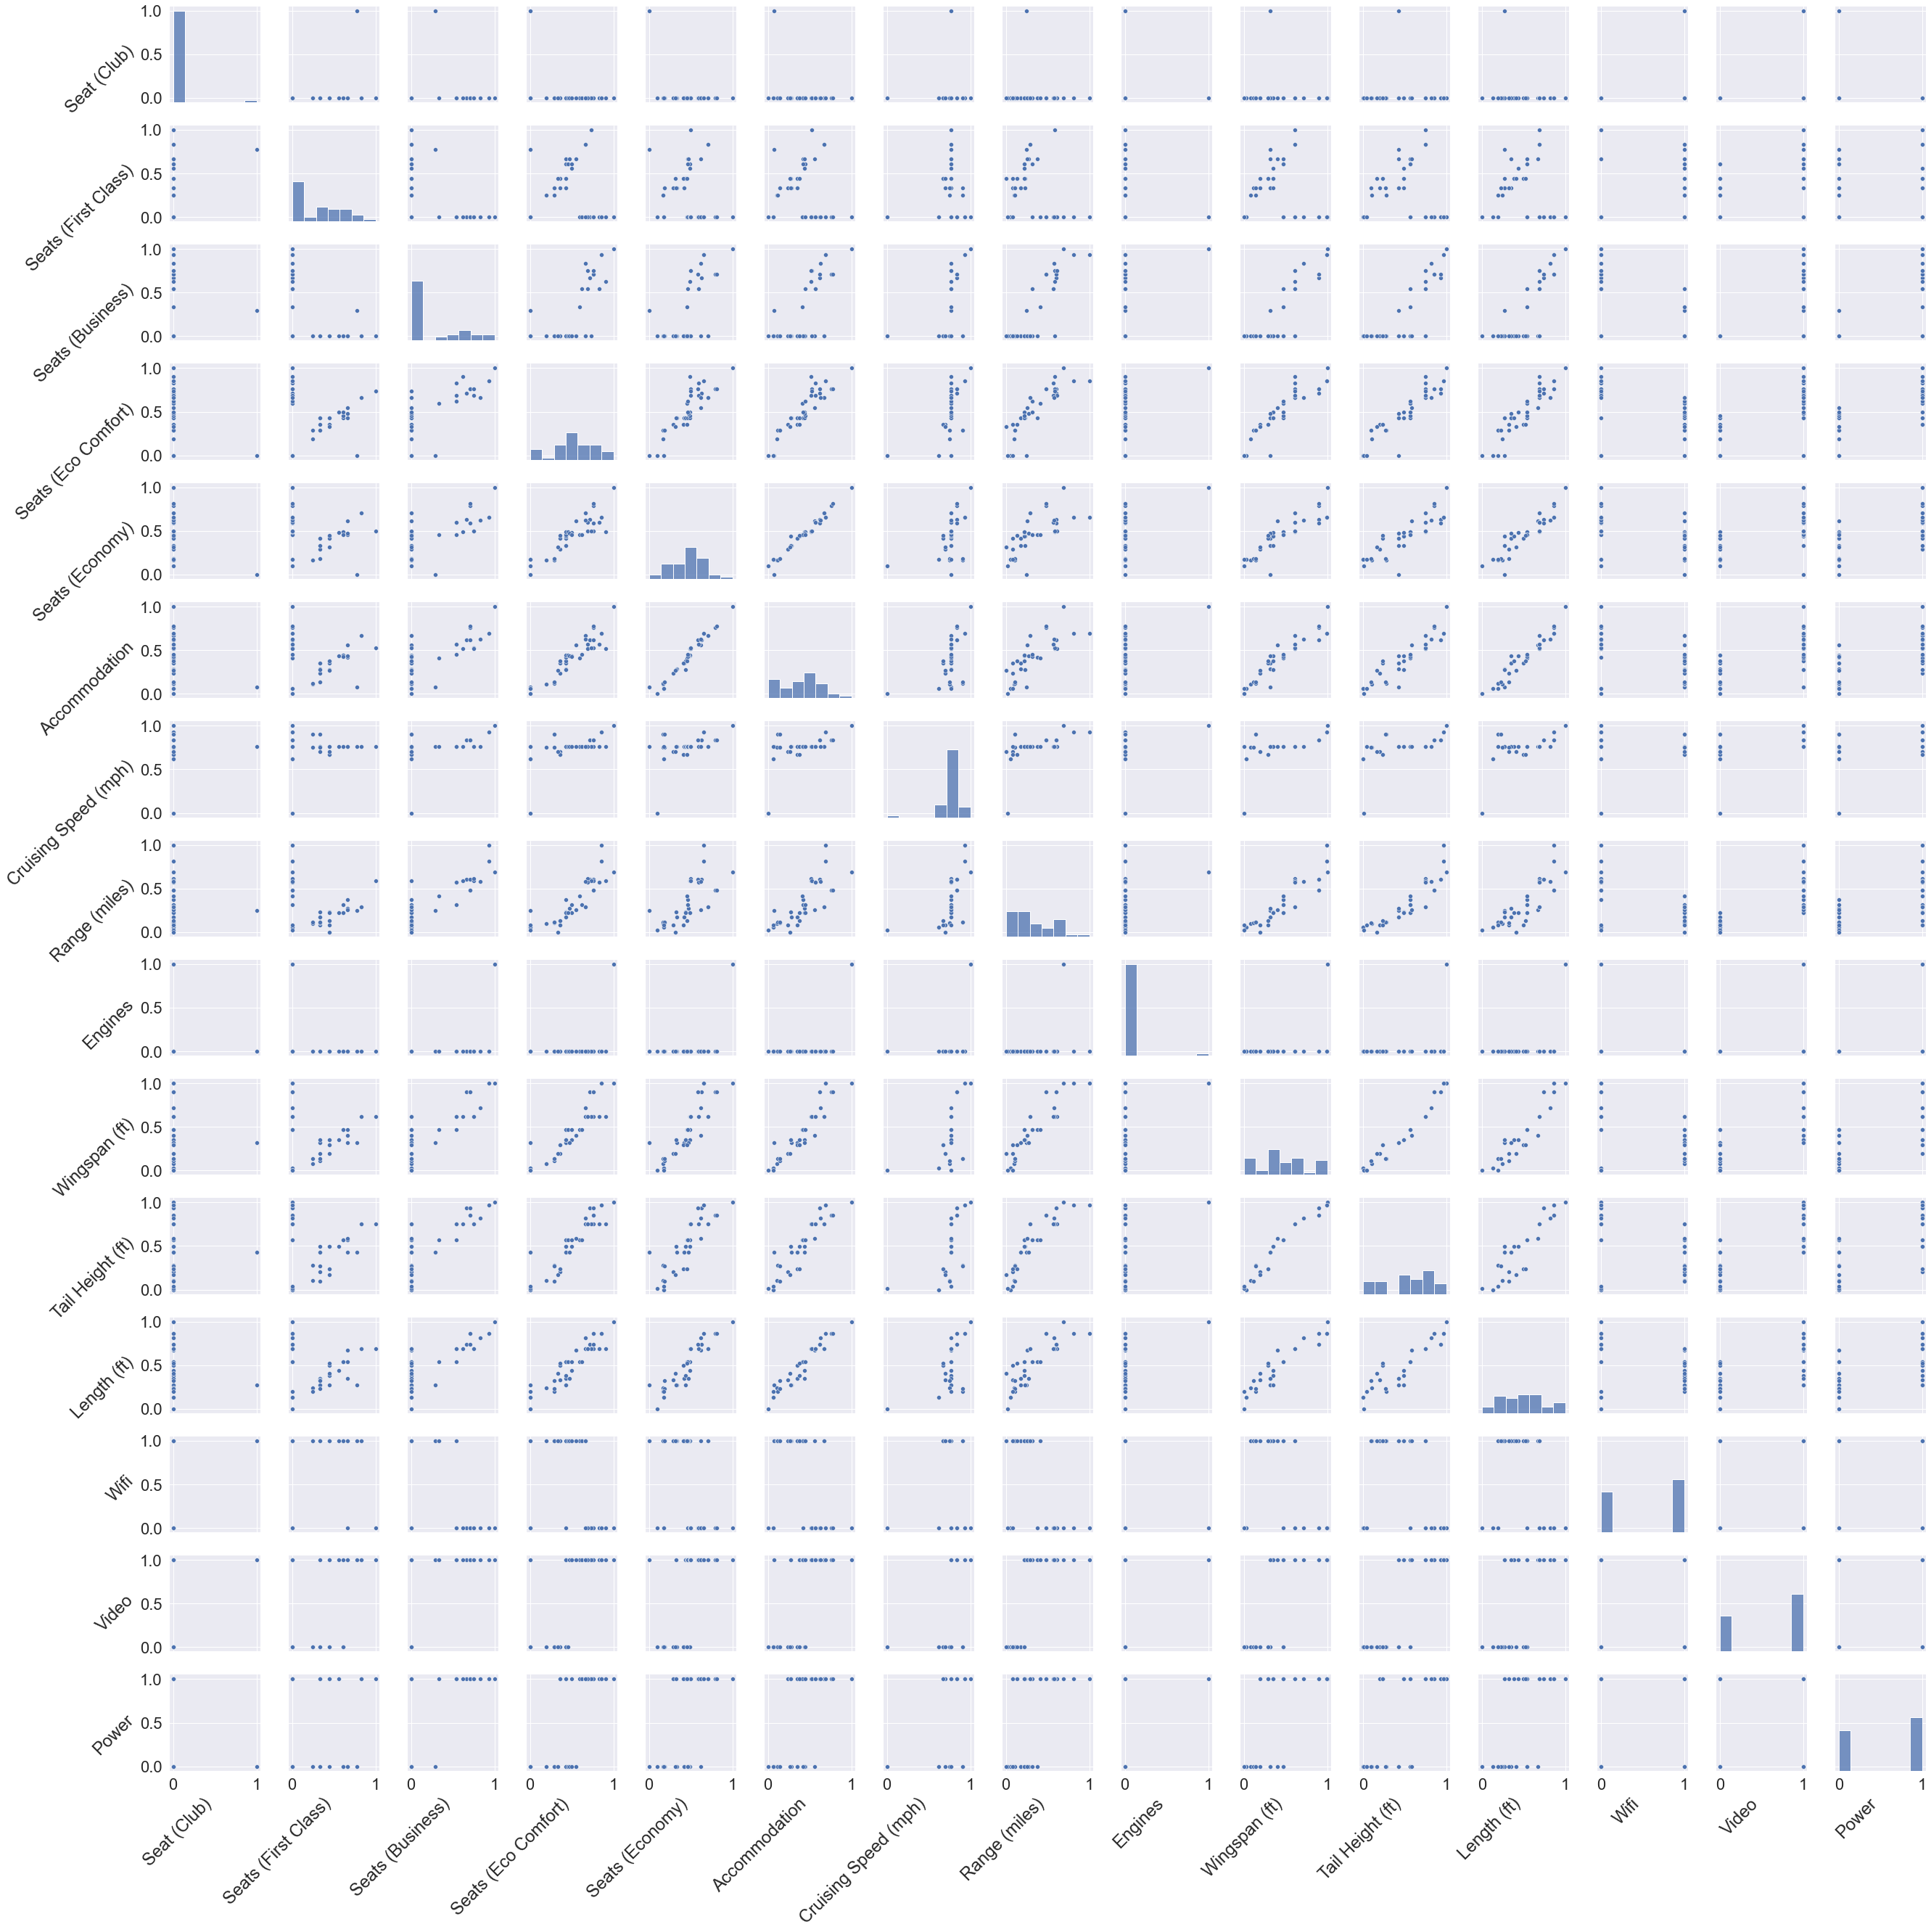

In [14]:
# Creating a pair plot of all the variables. This may take a couple of minutes.
sns.set(font_scale=2)
g = sns.pairplot(data_scaled)
for axes in g.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=45, horizontalalignment='right')
    axes.set_xlabel(axes.get_xlabel(), rotation=45, horizontalalignment='right')
plt.tight_layout()

Wait for the plot to finish before you continue.

Zooming in on a subset of the variables:

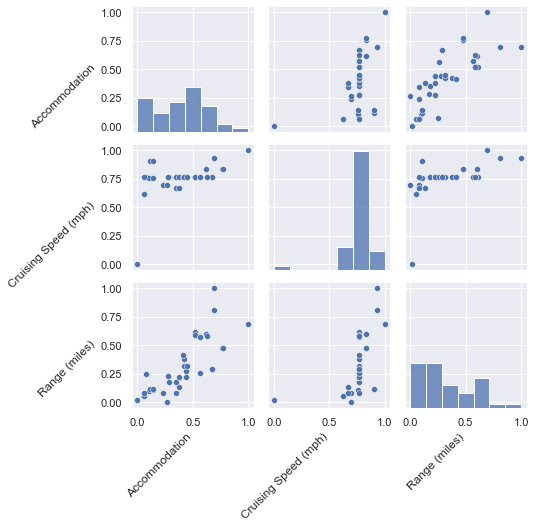

In [15]:
sns.set(font_scale=1)
subset_variables = ['Accommodation', 'Cruising Speed (mph)', 'Range (miles)']
g = sns.pairplot(data_scaled[subset_variables])
for axes in g.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=45, horizontalalignment='right')
    axes.set_xlabel(axes.get_xlabel(), rotation=45, horizontalalignment='right')
plt.tight_layout()

Some of the features are correlated, but they are definitely not grouped.

## Principal component analysis (PCA)
Principal components are vectors that describe the axes where we find the largest dat variations. Using linear decompositions along those axes, we can express as much of the variation as possible with fewer features. Also, PCA makes it easier to  identify the true clustering of the data.

If you want to know more about Principal Component Analysis, please review the «Ikke-veiledet læring» module of «Utvikling og anvendelse av intelligente systemer» (you may also want to revisit the «Ikke-veiledet læring» module of «Innføring i intelligente systemer»). Alternatively, you may read more here: https://365datascience.com/tutorials/python-tutorials/principal-components-analysis/.

t-SNE is a similar concept, but it works better for non-linear data. Both methods have been implemented by scikit-learn and are easy to use. Read more here: https://scikit-learn.org/0.15/modules/generated/sklearn.manifold.TSNE.html 

First, here is an example showing what happens when you do PCA from three to two dimensions. Most of the code is just workarounds to be able to do the plotting. Feel free to look at the figures and skip the code.

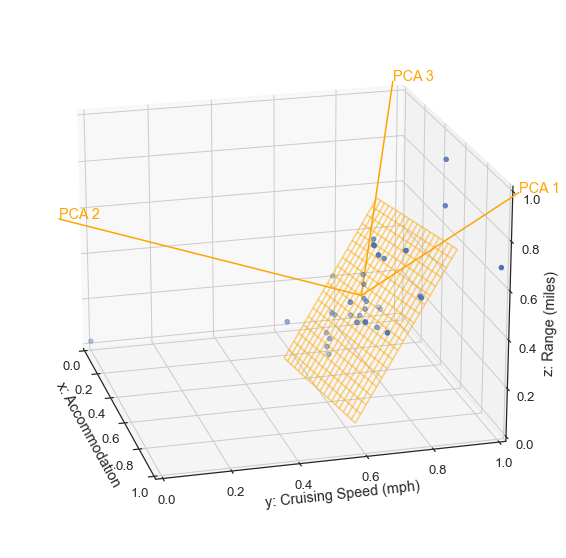

In [16]:
# We start by plotting the 3D data and their principal components
sns.set(font_scale=1.2)
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
data_plot = data_scaled[['Accommodation', 'Cruising Speed (mph)', 'Range (miles)']].copy()
ax.scatter(data_plot['Accommodation'], data_plot['Cruising Speed (mph)'], data_plot['Range (miles)'])#, marker=m)
ax.view_init(20, -15) #135)

ax.set_xlabel('x: Accommodation')
ax.set_ylabel('y: Cruising Speed (mph)')
ax.set_zlabel('z: Range (miles)')

ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

# We use PCA from sklearn
pca = PCA()
pca.fit(data_plot)

# Center of mass of data points
cm = data_plot.mean(axis=0).values
for i in range(len(pca.components_)):
    vector = pca.components_[i]
    xx = [cm[0], vector[0]+cm[0]]
    yy = [cm[1], vector[1]+cm[1]]
    zz = [cm[2], vector[2]+cm[2]]
    ax.plot(xx, yy, zz, color='orange')
    ax.text(xx[1], yy[1], zz[1], f'PCA {i+1}', color='orange')

# Create X and Y 2D arrays
x = np.linspace(0.1, 0.9 , num=20)
y = np.linspace(0.6, 0.9 , num=20)
X, Y = np.meshgrid(x, y)

def z_func(x, y, n_vector, anchor_point):
# Define Z-function
    d = -np.dot(n_vector, anchor_point) #possibly -
    z = (-n_vector[0]*x - n_vector[1]*y -d)/n_vector[2]
    return z

# Create Z 2D array
Z = z_func(X, Y, pca.components_[1], cm)
# Plot using Axes notation
ax.plot_wireframe(X, Y, Z, alpha=0.5, color='orange')

In [17]:
pca.explained_variance_ratio_

array([0.80651227, 0.1051317 , 0.08835603])

Text(0, 0.5, 'PCA 3')

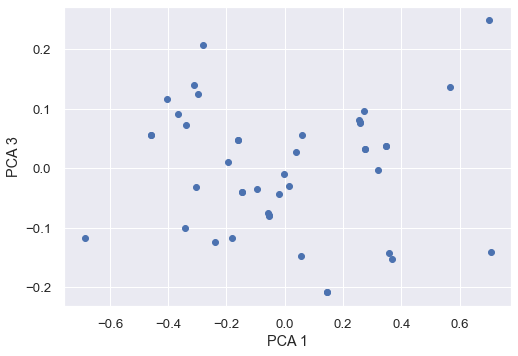

In [18]:
#Then we plot the points projected into the PCA1/PCA3 plane
plt.style.use('seaborn')
sns.set(font_scale=1.2)
data_pca = pd.DataFrame(pca.fit_transform(data_plot))
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(data_pca[0], data_pca[2])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 3')

_Oppgave: Svar på flervalgsspørsmålene 1–3 (vist nedenfor) i Canvas, og reflekter litt rundt svarene._

1. _Before computing the principal components, we standardized all the variables. Why does it make sense to standardize all the variables before applying Principal Component Analysis (PCA)?_
2. _Consider hypothetically a variable that can take any value between zero and one, while all other variables can take any value between zero and 100. The variable that can take values between zero and one is very important for the grouping of the data points. What can we say about the importance of the variables?_
3. _Look at the scatterplots showing the directions of the principal components. Along which principal component do we have most variation in the data points?_

The example above is meant to illustrate the effect of PCA, but we completely neglected most of the data dimensions. Let us do the full PCA on all the data and continue with the clustering.

## PCA on all components

In [19]:
# We use PCA from sklearn
pca = PCA()
pca.fit(data_scaled)

PCA()

In order to decide how many components to use, we can look at how much variance they each explain.

In [20]:
# How much variance is explained by each of the principal components?
pca.explained_variance_ratio_

array([6.00522725e-01, 1.70366893e-01, 7.70379554e-02, 6.19198898e-02,
       3.62334941e-02, 1.81174171e-02, 1.45570743e-02, 8.00430965e-03,
       5.15191173e-03, 3.81303870e-03, 1.84665948e-03, 1.00513256e-03,
       7.39707609e-04, 6.02050396e-04, 8.17412054e-05])

Text(0, 0.5, 'Cummulative explained variance')

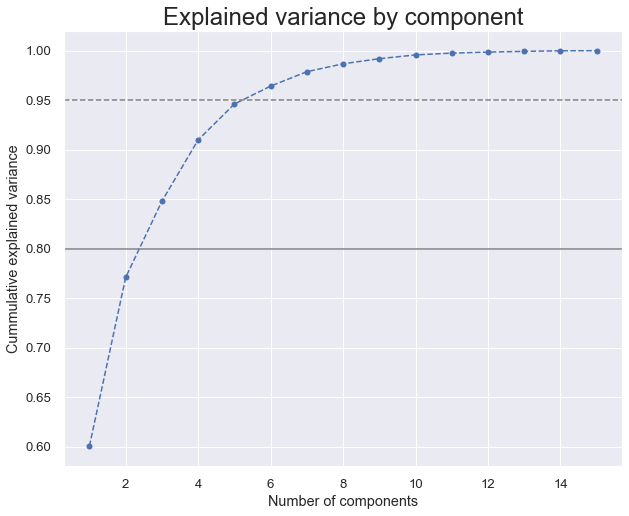

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8), sharey=False, sharex=True)
sns.set(font_scale=2)

axs.plot(range(1, len(plot_variables)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='dashed')
axs.axhline(0.95, color='grey', linestyle='dashed')
axs.axhline(0.80, color='grey')

axs.set_title('Explained variance by component')
axs.set_xlabel('Number of components')
axs.set_ylabel('Cummulative explained variance')

### How many components to keep?
A rule of thumb is to preserve 80 % of the variance. We select to keep 3 components.

In [22]:
n_components = 3
pca = PCA(n_components=n_components)
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))

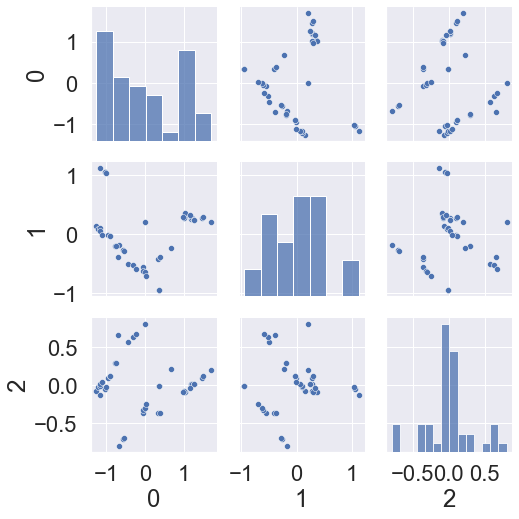

In [23]:
sns.pairplot(data_pca)

### How many clusters?
We now finally want to do k-means clustering to see if we can group the data points into similar aircrafts. The principal component analysis we did prior to this will come in handy, as we will reflect on later.

In order to do k-means clustering, we need to decide how many clusters we want. One way to do that is the so-called 'elbow'-method. See figure below.

In [24]:
data_pca.describe()

,0,1,2
count,4.400000e+01,4.400000e+01,4.400000e+01
mean,-9.083643e-17,6.138556e-17,1.450860e-17
std,9.390273e-01,5.001567e-01,3.363302e-01
min,-1.253502e+00,-9.472324e-01,-7.901951e-01
25%,-9.026159e-01,-3.810106e-01,-8.883912e-02
50%,-5.782582e-02,2.800551e-02,-9.734698e-03
75%,1.015424e+00,2.831088e-01,1.179947e-01
max,1.705122e+00,1.122882e+00,8.050758e-01


In [25]:
wcss = []
n_max_clusters = 10
for i in range(1, n_max_clusters):
    kmeans_pca = KMeans(n_clusters=i)
    kmeans_pca.fit(data_pca)
    wcss.append(kmeans_pca.inertia_)

C:\ProgramData\Anaconda3\envs\kristiania\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Within cluster sum of squares')

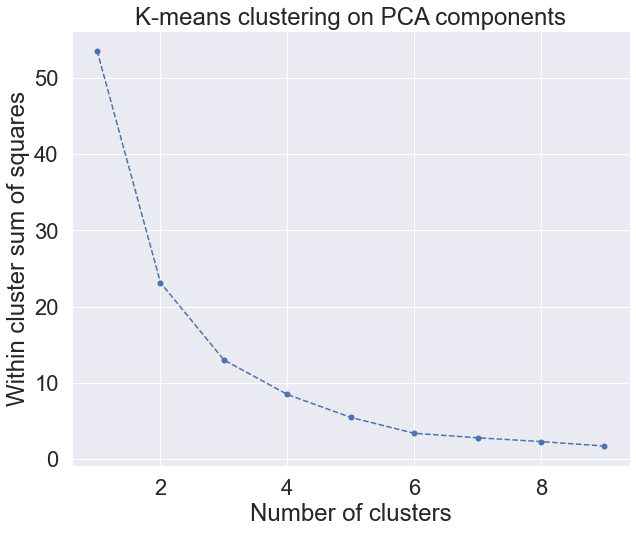

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8), sharey=False, sharex=True)
axs.plot(range(1, n_max_clusters), wcss, marker='o', linestyle='dashed')
axs.set_title('K-means clustering on PCA components')
axs.set_xlabel('Number of clusters')
axs.set_ylabel('Within cluster sum of squares')

When using the elbow method, we are looking for a change in slope. Here it's not very visible, but the curve is flattening out after 3 clusters.

### Final clustering

Let's have a look at the three clusters constructed using K-means, along the three different principal components. From the plot below, the diagonal figures show the clusters along each principal component (0 means the first principal component). The off-diagonal figures show the clusters along the two-dimensional space, with the "x-axis" along one principal component, and the "y-axis" along another principal component.

In [30]:
n_clusters = 3
kmeans_pca = KMeans(n_clusters=n_clusters)
kmeans_pca.fit(data_pca)
data_pca['cluster'] = kmeans_pca.labels_

C:\ProgramData\Anaconda3\envs\kristiania\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


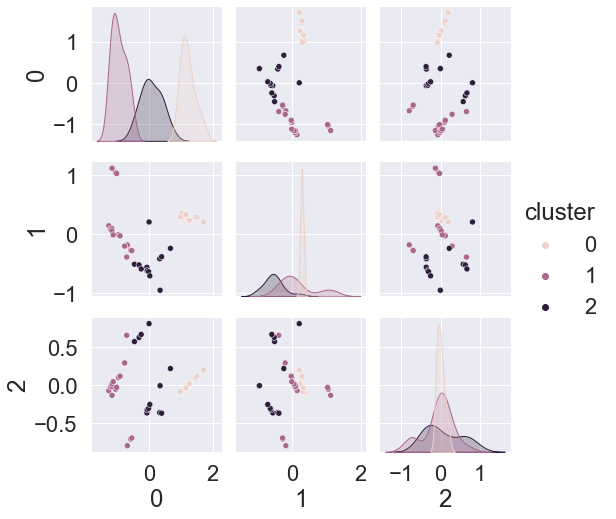

In [31]:
sns.pairplot(data_pca, hue='cluster')

## What do the clusters look like in the original data?

We will now visualize the clusters along the original axes, namely along the axis of each of the variables.

In [32]:
data_scaled['cluster'] = kmeans_pca.labels_

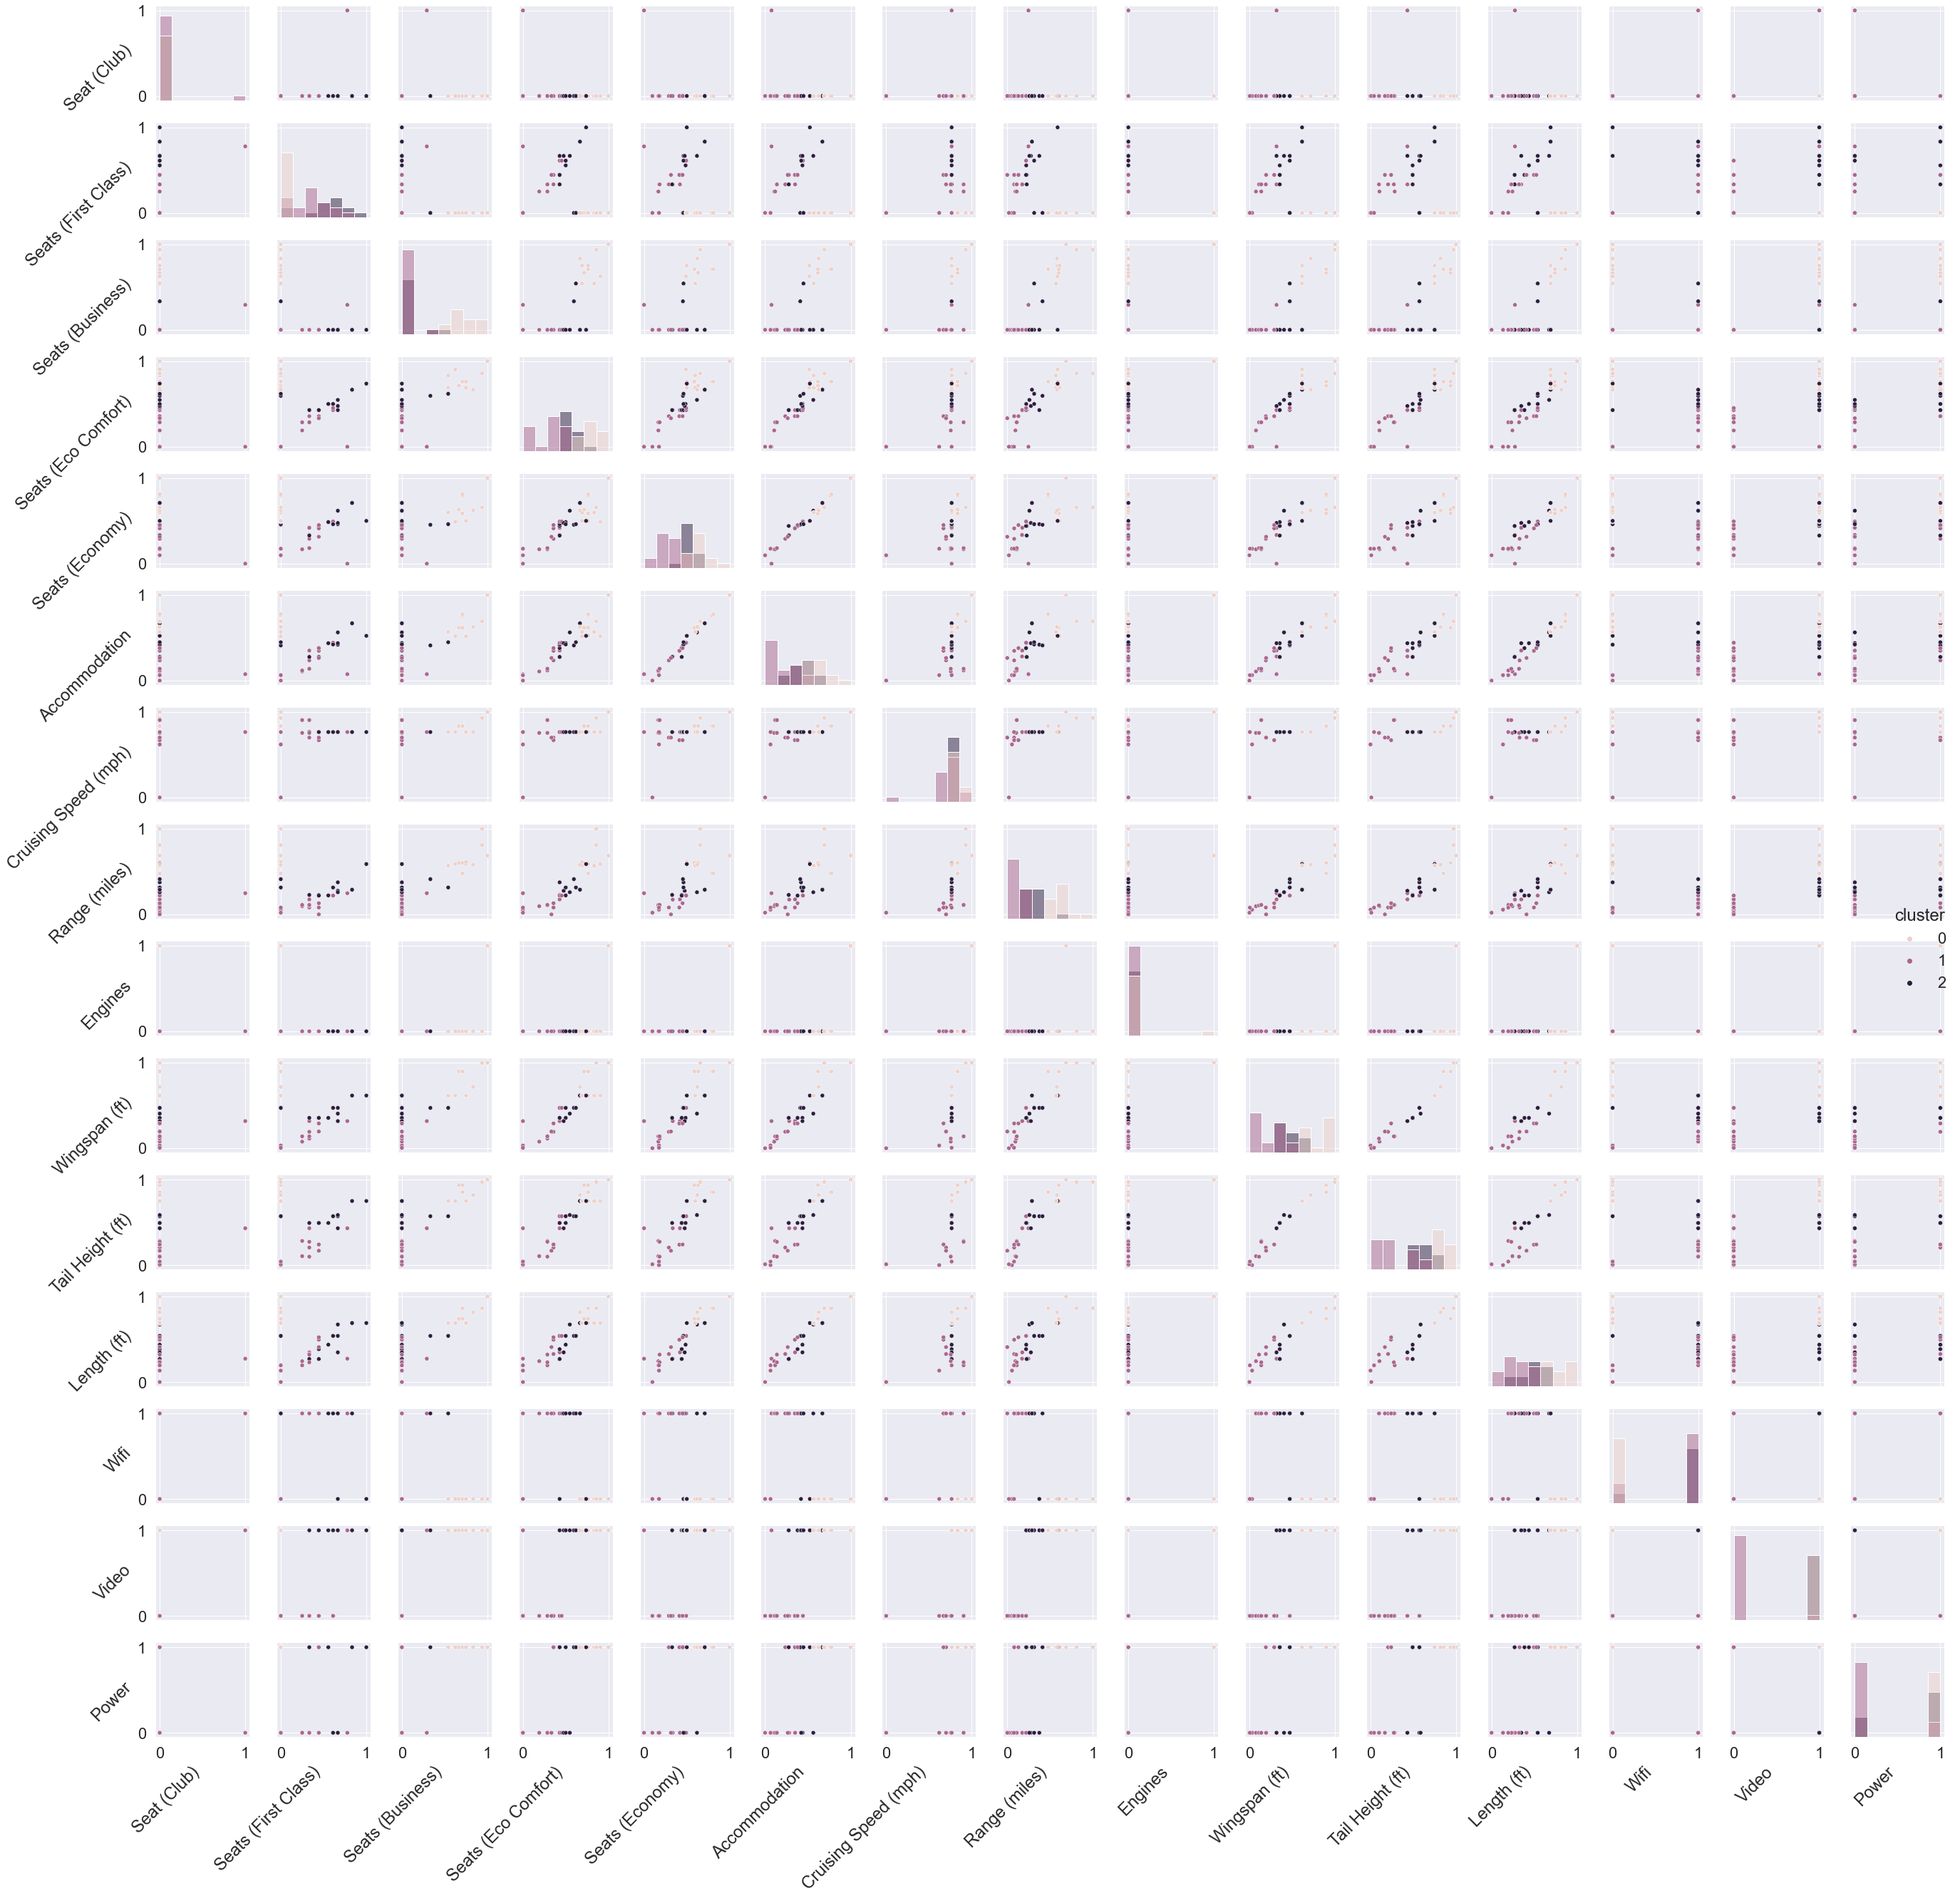

In [33]:
#Plotting the pairplot again but with the clusters. This may take a couple of minutes.
sns.set(font_scale=2)
g = sns.pairplot(data_scaled, hue='cluster', diag_kind='hist')
for axes in g.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=45, horizontalalignment='right')
    axes.set_xlabel(axes.get_xlabel(), rotation=45, horizontalalignment='right')
plt.tight_layout()

Wait for the plot to finish.

Again we also zoom in on a subset of the variables.

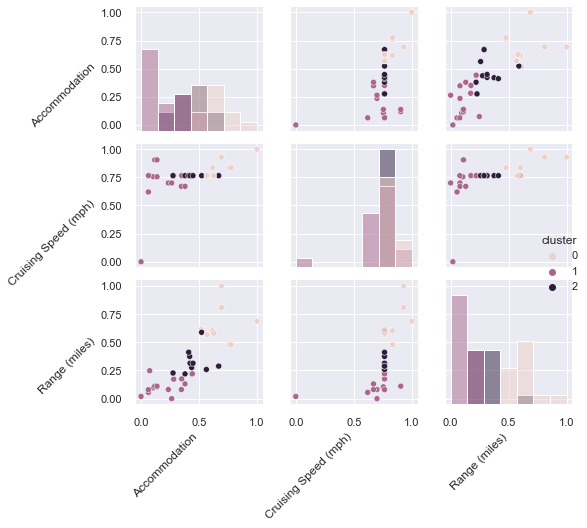

In [34]:
sns.set(font_scale=1)
subset_variables = ['Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'cluster']
g = sns.pairplot(data_scaled[subset_variables], hue='cluster', diag_kind='hist')
for axes in g.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=45, horizontalalignment='right')
    axes.set_xlabel(axes.get_xlabel(), rotation=45, horizontalalignment='right')
plt.tight_layout()

Wait for the plot to finish. 

_Oppgave: Svar på flervalgsspørsmålene 4–6 (vist nedenfor) i Canvas._

4. _Using k-means and visualizing the clusters along the principal components, how is it easiest to separate the different clusters?_
5. _How would you proceed to understand the practical reason for why a particular data point is classified into one out of three types of aircrafts?_
6. _What are the outcomes and interpretations of the principal components?_